## Explorations for Textures and Blob Detections

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy.ndimage import convolve
from glob import glob
import os
import random
import csv
from sklearn.model_selection import train_test_split
import pandas as pd
import imageio.v3 as iio
import cv2 as cv

import project_lib as plib
import skimage

In [5]:
import importlib
importlib.reload(plib)

<module 'project_lib' from '/home/rakesh/Desktop/w281/w281-cv-final-project/code/project_lib.py'>

In [8]:
## Generate Train Test Val split.
metadata = pd.read_csv(plib.csv_path)
train, test = train_test_split(metadata, test_size=0.25)

test, val = train_test_split(test, test_size=0.20)

print(metadata.head())
#print(len(train), len(test), len(val))

                 name                                           path  \
0   Normal (2695).png   ./data/Train/Normal/images/Normal (2695).png   
1  Normal (10980).png  ./data/Train/Normal/images/Normal (10980).png   
2   Normal (3522).png   ./data/Train/Normal/images/Normal (3522).png   
3   Normal (4141).png   ./data/Train/Normal/images/Normal (4141).png   
4   Normal (2219).png   ./data/Train/Normal/images/Normal (2219).png   

                                           mask_path  class  
0   ./data/Train/Normal/lung masks/Normal (2695).png      0  
1  ./data/Train/Normal/lung masks/Normal (10980).png      0  
2   ./data/Train/Normal/lung masks/Normal (3522).png      0  
3   ./data/Train/Normal/lung masks/Normal (4141).png      0  
4   ./data/Train/Normal/lung masks/Normal (2219).png      0  


## SIFT Feature Detection

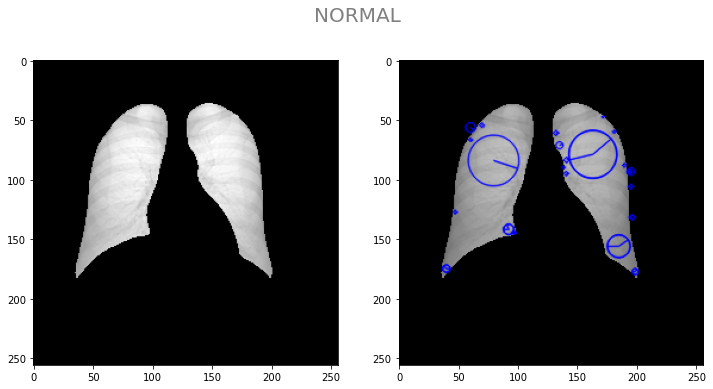

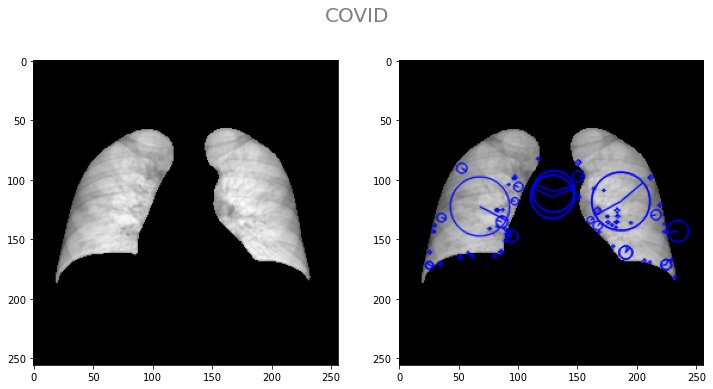

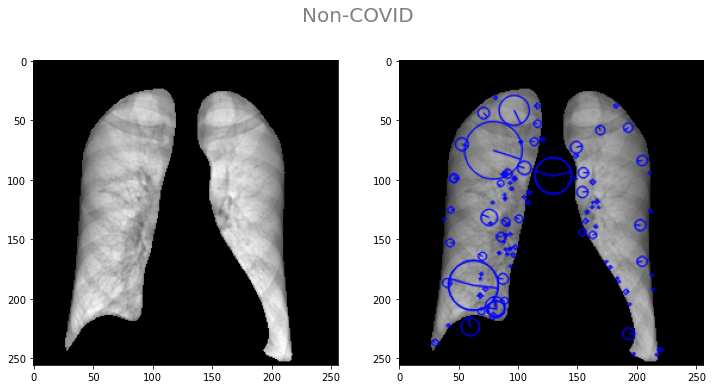

In [10]:
imgs_to_process = plib.fetch_lung_masked_images(val[val['class']==0].head(1))
keypoints, kp_img = plib.get_SIFT_keypoints_for_img(imgs_to_process[0])

plib.plot_images([imgs_to_process[0], kp_img], "NORMAL")

imgs_to_process = plib.fetch_lung_masked_images(val[val['class']==1].head(1))
keypoints, kp_img = plib.get_SIFT_keypoints_for_img(imgs_to_process[0])

plib.plot_images([imgs_to_process[0], kp_img], "COVID")

imgs_to_process = plib.fetch_lung_masked_images(val[val['class']==2].head(1))
keypoints, kp_img = plib.get_SIFT_keypoints_for_img(imgs_to_process[0])

plib.plot_images([imgs_to_process[0], kp_img], "Non-COVID")


## Cluster SIFT features into Gaussian Mixture Clusters

(120,)


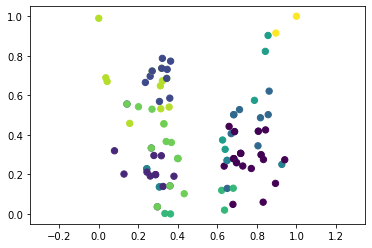

In [11]:
importlib.reload(plib)

imgs_to_process = plib.fetch_lung_masked_images(val[val['class']==0].head(1))
denoised_clahe_enhanced = plib.get_preprocessed_img(imgs_to_process[0])

keypoints, kp_img = plib.get_SIFT_keypoints_for_img(denoised_clahe_enhanced)

blob_features = plib.get_sift_clusters(n_clusters=10, keypoints=keypoints, plot=True)
print(blob_features.shape)

## Gray Level Co-occurance Matrix (GLCM)

In [12]:
importlib.reload(plib)

imgs_to_process = plib.fetch_lung_masked_images(val[val['class']==0].head(1))
denoised_clahe_enhanced = plib.get_preprocessed_img(imgs_to_process[0])

glcm_features = plib.get_glcm_features(denoised_clahe_enhanced)

print(glcm_features)

[0.         0.96909706 0.07328061 1.         0.0012053  1.
 0.         0.93284359 0.29949237 0.         1.         0.05888867
 0.43372264 0.01090072 1.         0.         1.         0.0311978
 0.92573014 0.         0.4330632  0.01087177 1.         0.        ]


## Local Binary Patterns (LBP)

(26,)


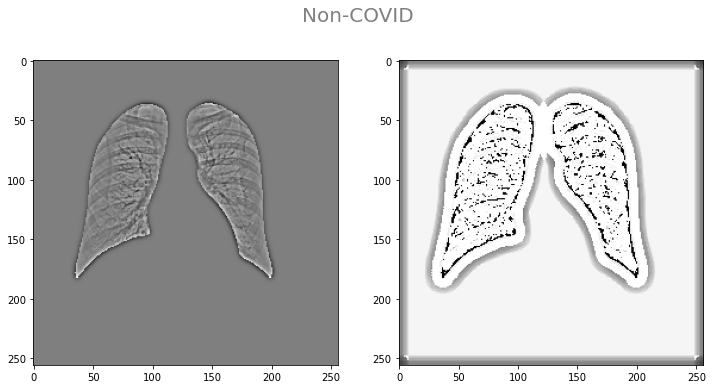

In [13]:
# initialize the local binary patterns descriptor along with
# the data and label lists
imgs_to_process = plib.fetch_lung_masked_images(val[val['class']==0].head(1))
denoised_clahe_enhanced = plib.get_preprocessed_img(imgs_to_process[0])

lbp_features, lbp = plib.get_lbp_features(denoised_clahe_enhanced)

print(lbp_features.shape)

plib.plot_images([denoised_clahe_enhanced, lbp], "Non-COVID")

## Combined Feature Vector

In [14]:
feature_vec = np.concatenate((lbp_features, glcm_features, blob_features), axis=None)

print(feature_vec.shape)

(170,)
